In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from src.utils import load_json

KeyboardInterrupt: 

In [ ]:
# Load experiments.csv

res_dir = "/projects/p30041/spn1560/hiec/artifacts/model_evals/gnn"
exp = pd.read_csv(f"{res_dir}/experiments.csv", sep='\t', index_col=0)
exp.head()

,n_epochs,pred_head,message_passing,agg,d_h_encoder,model,featurizer,encoder_depth,toc,n_splits,split_strategy,neg_multiple,embed_type,seed,dataset_name,split_sim_threshold,embed_dim
0,25,dot_sig,NaN,NaN,20,ffn,mfp,3.0,sp_folded_pt,5,homology,1,esm,1234,sprhea,0.8,1280
1,25,dot_sig,NaN,NaN,20,ffn,mfp,2.0,sp_folded_pt,5,homology,1,esm,1234,sprhea,0.8,1280
2,25,dot_sig,NaN,NaN,20,ffn,mfp,1.0,sp_folded_pt,5,homology,1,esm,1234,sprhea,0.8,1280
3,25,dot_sig,NaN,NaN,50,ffn,mfp,3.0,sp_folded_pt,5,homology,1,esm,1234,sprhea,0.8,1280
4,25,dot_sig,NaN,NaN,50,ffn,mfp,2.0,sp_folded_pt,5,homology,1,esm,1234,sprhea,0.8,1280


In [4]:
exp.drop(labels=[81, 82], inplace=True)

In [5]:
for hi, row in exp.iterrows():
    agg_scores = defaultdict(list)
    n_splits = row['n_splits']
    for si in range(n_splits):
        scores = load_json(f"{res_dir}/{hi}_hp_idx_split_{si+1}_of_{n_splits}/version_0/test_scores.json")
        for name, val in scores.items():
            agg_scores[name].append(val)

    if hi == 0:
        for name in agg_scores.keys():
            exp[f"{name}_mean"] = np.NaN
            exp[f"{name}_sem"] = np.NaN
    
    for name, val in agg_scores.items():
        exp.loc[hi, f"{name}_mean"] = np.array(val).mean()
        exp.loc[hi, f"{name}_sem"] = np.array(val).std() / np.sqrt(n_splits)

exp.head()

,n_epochs,pred_head,message_passing,agg,d_h_encoder,model,featurizer,encoder_depth,toc,n_splits,...,split_sim_threshold,embed_dim,f1_mean,f1_sem,precision_mean,precision_sem,recall_mean,recall_sem,accuracy_mean,accuracy_sem
0,25,dot_sig,NaN,NaN,20,ffn,mfp,3.0,sp_folded_pt,5,...,0.8,1280,0.620535,0.029416,0.916369,0.013761,0.472561,0.031651,0.715904,0.016321
1,25,dot_sig,NaN,NaN,20,ffn,mfp,2.0,sp_folded_pt,5,...,0.8,1280,0.617538,0.031305,0.915270,0.014218,0.469564,0.034096,0.714689,0.017508
2,25,dot_sig,NaN,NaN,20,ffn,mfp,1.0,sp_folded_pt,5,...,0.8,1280,0.701963,0.025896,0.930098,0.012949,0.565944,0.030328,0.763964,0.013884
3,25,dot_sig,NaN,NaN,50,ffn,mfp,3.0,sp_folded_pt,5,...,0.8,1280,0.611627,0.031135,0.924502,0.015380,0.459779,0.032920,0.713284,0.017152
4,25,dot_sig,NaN,NaN,50,ffn,mfp,2.0,sp_folded_pt,5,...,0.8,1280,0.690189,0.029732,0.933042,0.011475,0.551174,0.034836,0.757626,0.016938


In [7]:
display_res = exp[['model', 'agg', 'pred_head', 'featurizer', 'd_h_encoder', 'encoder_depth', 'n_epochs', 'f1_mean', 'precision_mean', 'recall_mean', 'accuracy_mean', 'f1_sem', 'precision_sem', 'recall_sem', 'accuracy_sem']]
display_res.sort_values(by=['f1_mean'], ascending=False).head(100)

,model,agg,pred_head,featurizer,d_h_encoder,encoder_depth,n_epochs,f1_mean,precision_mean,recall_mean,accuracy_mean,f1_sem,precision_sem,recall_sem,accuracy_sem
29,mpnn_dim_red,mean,dot_sig,rxn_rc,300,3.0,25,0.885094,0.953927,0.827822,0.895049,0.018697,0.008521,0.029559,0.014658
45,mpnn_dim_red,last,dot_sig,rxn_rc,300,3.0,25,0.881590,0.945873,0.828663,0.891647,0.021046,0.008724,0.033925,0.016720
28,mpnn_dim_red,mean,dot_sig,rxn_simple,300,3.0,25,0.879638,0.947186,0.822345,0.889060,0.013752,0.009497,0.021399,0.010851
54,mpnn_dim_red,mean,dot_sig,rxn_simple,300,3.0,25,0.879184,0.946644,0.822502,0.889335,0.017679,0.009781,0.027318,0.013641
46,mpnn_dim_red,last,dot_sig,rxn_rc,300,2.0,25,0.879083,0.942698,0.827175,0.889929,0.023917,0.008018,0.038047,0.018872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,ffn,NaN,binary,mfp,300,3.0,25,0.480780,0.888412,0.331229,0.646504,0.024705,0.023174,0.021946,0.011288
17,ffn,NaN,binary,mfp,300,1.0,25,0.467742,0.919903,0.315715,0.647333,0.032751,0.015490,0.027530,0.010804
16,ffn,NaN,binary,mfp,300,2.0,25,0.460691,0.863629,0.318223,0.636490,0.037639,0.032519,0.033300,0.013001
7,ffn,NaN,dot_sig,mfp,300,2.0,25,0.317290,0.695692,0.227585,0.597191,0.108479,0.159717,0.087387,0.037366


In [9]:
best = 29
# selector = (display_res['agg'] == 'last') &  (display_res['pred_head'] == 'dot_sig')
selector = (display_res.loc[best, 'f1_mean'] - display_res['f1_mean'] < display_res.loc[best, 'f1_sem']) & (display_res['pred_head'] != 'binary')
display_res.loc[selector].sort_values(by=['f1_mean'], ascending=False)

,model,agg,pred_head,featurizer,d_h_encoder,encoder_depth,n_epochs,f1_mean,precision_mean,recall_mean,accuracy_mean,f1_sem,precision_sem,recall_sem,accuracy_sem
29,mpnn_dim_red,mean,dot_sig,rxn_rc,300,3.0,25,0.885094,0.953927,0.827822,0.895049,0.018697,0.008521,0.029559,0.014658
45,mpnn_dim_red,last,dot_sig,rxn_rc,300,3.0,25,0.881590,0.945873,0.828663,0.891647,0.021046,0.008724,0.033925,0.016720
28,mpnn_dim_red,mean,dot_sig,rxn_simple,300,3.0,25,0.879638,0.947186,0.822345,0.889060,0.013752,0.009497,0.021399,0.010851
54,mpnn_dim_red,mean,dot_sig,rxn_simple,300,3.0,25,0.879184,0.946644,0.822502,0.889335,0.017679,0.009781,0.027318,0.013641
46,mpnn_dim_red,last,dot_sig,rxn_rc,300,2.0,25,0.879083,0.942698,0.827175,0.889929,0.023917,0.008018,0.038047,0.018872
79,mpnn_dim_red,mean,dot_sig,rxn_simple,300,3.0,50,0.878927,0.948125,0.820533,0.888767,0.014871,0.009381,0.023154,0.011582
77,mpnn_dim_red,attention,dot_sig,rxn_rc,300,3.0,25,0.877276,0.947169,0.820332,0.888390,0.022190,0.009665,0.034985,0.017548
78,mpnn_dim_red,mean,dot_sig,rxn_rc,300,3.0,50,0.877000,0.955051,0.813376,0.888319,0.019196,0.008240,0.030962,0.015496
27,mpnn_dim_red,mean,dot_sig,rxn_rc,50,3.0,25,0.875645,0.945682,0.817243,0.886223,0.017433,0.009785,0.027051,0.013488
80,mpnn_dim_red,last,dot_sig,rxn_rc,300,3.0,50,0.874652,0.946193,0.816397,0.885778,0.020651,0.008846,0.033310,0.016358


In [7]:
selector = (display_res['model'] == 'linear')
display_res.loc[selector].sort_values(by=['f1_mean'], ascending=False)

,model,agg,pred_head,featurizer,d_h_encoder,encoder_depth,f1_mean,precision_mean,recall_mean,accuracy_mean,f1_sem,precision_sem,recall_sem,accuracy_sem
67,linear,NaN,dot_sig,mfp,50,NaN,0.823180,0.941876,0.733987,0.845814,0.022353,0.010960,0.033287,0.015675
68,linear,NaN,dot_sig,mfp,300,NaN,0.820104,0.955914,0.720993,0.845550,0.023082,0.007669,0.033518,0.015259
66,linear,NaN,dot_sig,mfp,20,NaN,0.799593,0.937196,0.698900,0.827741,0.019694,0.012237,0.026441,0.012358
71,linear,NaN,binary,mfp,300,NaN,0.642180,0.927866,0.499890,0.730691,0.041006,0.013558,0.047801,0.022671
70,linear,NaN,binary,mfp,50,NaN,0.629256,0.928596,0.481252,0.722431,0.032995,0.014316,0.037665,0.019364
69,linear,NaN,binary,mfp,20,NaN,0.565194,0.933949,0.412977,0.694837,0.047880,0.009867,0.049096,0.022057


In [40]:
exp.loc[78]

n_epochs                                2
pred_head                         dot_sig
message_passing                  bondwise
agg                                  mean
d_h_encoder                            20
model                        mpnn_dim_red
featurizer                     rxn_simple
encoder_depth                         1.0
toc                     sp_folded_pt_test
n_splits                                2
split_strategy                   homology
similarity_threshold                  NaN
neg_multiple                            1
embed_type                            esm
seed                                 1234
dataset_name                       sprhea
split_sim_threshold                   0.8
embed_dim                            1280
Name: 78, dtype: object

# TODO: Loss curves

In [128]:
gs_name = "mfp_ffn_homology_80_0"
gs_path = f"/projects/p30041/spn1560/hiec/artifacts/model_evals/gnn/{ds_toc}_{gs_name}"
hp_idx = 5
n_splits = 5

loss_curves = defaultdict(lambda: defaultdict()) # 'hpidx_sidx': {epochs: [int], losses: [float])
for sidx in range(n_splits):
    hsd = f"{hp_idx}_hp_idx_split_{sidx + 1}_of_{n_splits}"
    lc = pd.read_csv(f"{gs_path}/{hsd}/version_0/metrics.csv", sep=',')
    ep_ave_lc = lc.groupby('epoch').agg('mean').reset_index() # Average over epochs
    loss_curves[hsd]['epochs'] = ep_ave_lc.loc[:, 'epoch'].to_numpy()
    loss_curves[hsd]['losses'] = ep_ave_lc.loc[:, 'train_loss'].to_numpy()

# tr_losses = np.vstack(tr_losses)
# loss_curves["losses"] = tr_losses.mean(axis=1)
# loss_curves[""]



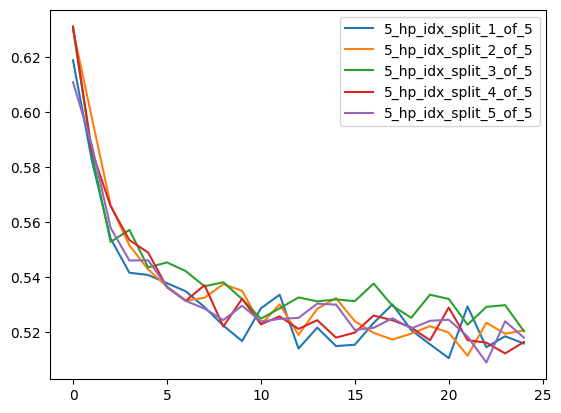

In [129]:
fig, ax = plt.subplots()
for k,v in loss_curves.items():
    ax.plot(v['epochs'], v['losses'], label=k)

ax.legend()
plt.show()

In [125]:
bad_lc = {k:v for k,v in loss_curves.items() if v['losses'][-1] > 0.4}
sorted(bad_lc.keys())

[]

In [ ]:
metrics = [
    'f1',
    'precision',
    'recall',
    'accuracy'
]

cluster_conditions = [
    'binary',
    'dot_sig'
]

x_conditions = [
    20,
    50,
    300
]

cluster_col = 'pred_head'
x_col = 'd_h_mpnn'

'''
cluster_condition: {x_idx_condition: (mean, std)}

'''
scores = defaultdict(lambda : defaultdict(lambda : defaultdict(tuple)))
for cc in cluster_conditions:
    for xc in x_conditions:
        for m in metrics:
            mean = combo.loc[(combo[cluster_col] == cc) & (combo[x_col] == xc), f"{m}_mean"].to_numpy()[0]
            std = combo.loc[(combo[cluster_col] == cc) & (combo[x_col] == xc), f"{m}_std"].to_numpy()[0]
            scores[cc][xc][m] = (mean, std)

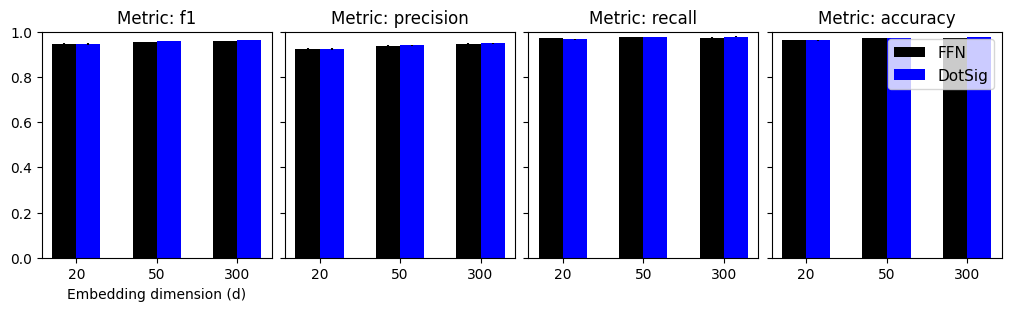

In [ ]:
# Plot esm vs full at all ds tried

# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np


cluster_condition_names = ["FFN", "DotSig"]
colors = ['black', 'blue']

x = np.arange(len(x_conditions))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(ncols=4, sharey=True, figsize=(10,3), constrained_layout=True)

for i, m in enumerate(metrics):
# for i, d  in enumerate(ds):
    for j, name in enumerate(scores.keys()):
        data = [scores[name][d][m] for d in x_conditions]
        # x = list(data.keys())
        mu, sig = list(zip(*data))
        offset = width * (j - 0.5)
        rects = ax[i].bar(x + offset, mu, yerr=sig, width=width, label=cluster_condition_names[j], color=colors[j])
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(x_conditions)
        ax[i].set_title(f"Metric: {m}")

ax[-1].legend(loc='upper right', fontsize=11)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Embedding dimension (d)")


plt.show()

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(
    {'foo':[1,1,3,1],
     'bar':[2,2,4,4],
     'data':[0.8, 0.9, 0.5, 0.3]}
)

df.head()

,foo,bar,data
0,1,2,0.8
1,1,2,0.9
2,3,4,0.5
3,1,4,0.3


In [23]:
gb = df.groupby(by=['foo', 'bar'])

for _, elt in gb:

    for i, row in elt.iterrows():
        print(i, row)

0 foo     1.0
bar     2.0
data    0.8
Name: 0, dtype: float64
1 foo     1.0
bar     2.0
data    0.9
Name: 1, dtype: float64
3 foo     1.0
bar     4.0
data    0.3
Name: 3, dtype: float64
2 foo     3.0
bar     4.0
data    0.5
Name: 2, dtype: float64


In [24]:
elt.head()

,foo,bar,data
2,3,4,0.5
